# chunk_audio_handler

- Updated to generate a normal distrubtion of chunks instead of uniform
- Script to break a .wav audio file into a normally distrubuted set of chunks. XTTS fine-tuning requires small second-sized chunks of audio, not full length audio files.

In [69]:
from pydub import AudioSegment
import webvtt
import os
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [70]:
# Load audio
audio = AudioSegment.from_wav("audio/tom_hanks_dutch_house.wav")  

# Get the total length of time, in ms, for the audio file
totalLength = len(audio)
print(totalLength)


# Define output path for chunks
outputDir = "datasets/tom_hanks_dutch_house/wavs/"
print(f"Output dir: {outputDir}")

17940840
Output dir: datasets/tom_hanks_dutch_house/wavs/


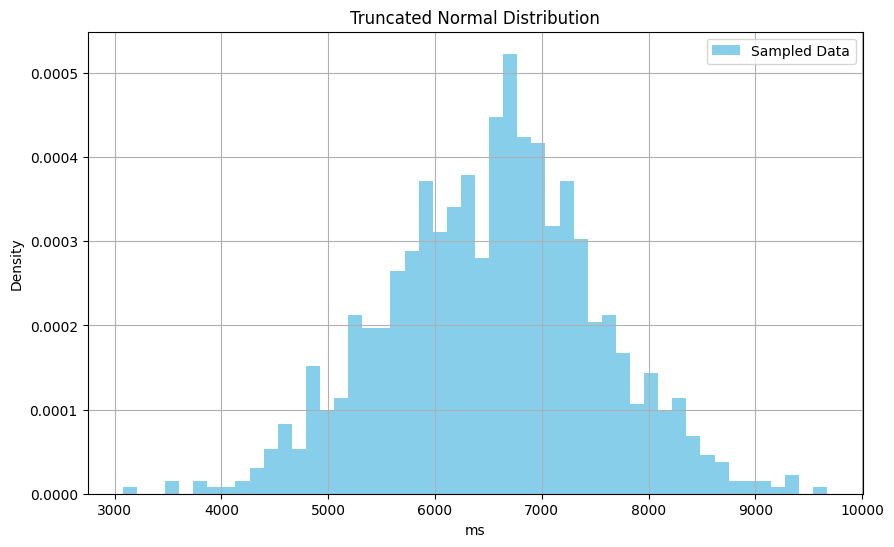

In [71]:
# Define set of parameters for the distrubiton curve
# Define upper and lower bound values for the chunk sizes in seconds
ub = 10
lb = 3

# Define the mean and standard dev
mean = (ub+lb)/2
sd = 1

a = (lb - mean)/sd
b = (ub - mean)/sd

# Use scipy's truncnorm to generate a random variable with the given parameters
X = truncnorm(a=a,
             b=b,
             loc=mean,
             scale=sd)

# Use random variable to generate a set of samples

data = X.rvs(1000)

# Round data so they represent whole seconds
data = np.round(data,decimals=3)

# convert to ms
datams = data * 1000

# Plot the histogram to show it looks normal
plt.figure(figsize=(10, 6))
plt.hist(datams, bins=50, density=True, color='skyblue', label='Sampled Data')
plt.title("Truncated Normal Distribution")
plt.xlabel("ms")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

In [72]:
'''
Redo 
'''

# Define var to keep track of how many ms of chunks have been created.
# This cannot go over the total length - max length for safety

generateLimit = totalLength - ub

generatedChunksMs = 0

# Time iter to keep track of how many chunks generated
i = 0

# create list to track audio file length
trackChunks = []


# Extract the needed number of audio chunks from the audio file
while generatedChunksMs < generateLimit:
    # Sample from generate normal distrubtion of chunk sizes
    chunkLength = np.random.choice(datams)
    
    # Get the start and end time for the chunk
    start = generatedChunksMs
    end = min(start + chunkLength, totalLength)
    
    # Extract audio and output labeled chunk into ouput dir as a wav file
    chunk = audio[start:end]
    chunk.export(f"{outputDir}chunk_{i:04}.wav", format="wav")
    
    # Add chunk size to tracker
    trackChunks.append(end-start)
    
    # Add chunk length to generatedChunk counter
    generatedChunksMs += chunkLength
    # add to iterate value
    i += 1
print(f"Chunk extraction completed... Number of chunks creater {i}.")

Chunk extraction completed... Number of chunks creater 2737.


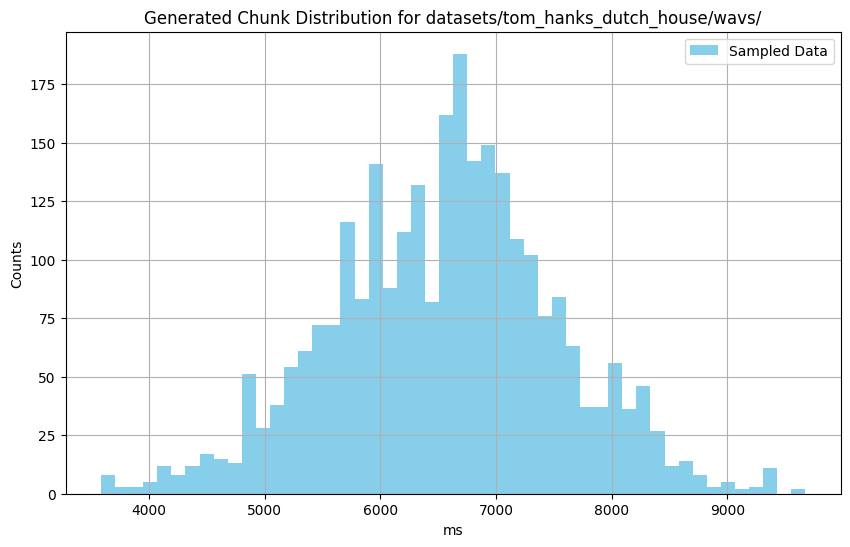

In [73]:
# Check work with plot
# Plot the histogram to show it looks normal
plt.figure(figsize=(10, 6))
plt.hist(trackChunks, bins=50, density=False, color='skyblue', label='Sampled Data')
plt.title(f"Generated Chunk Distribution for {outputDir}")
plt.xlabel("ms")
plt.ylabel("Counts")
plt.legend()
plt.grid(True)
plt.show()